In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

In [4]:
# load the data as dataframe
data = pd.read_csv("data/Loan_Default.csv")

In [5]:
# set options to show all columns
pd.set_option("display.max_columns", data.shape[-1])

In [6]:
# lower case all column names
data.columns= data.columns.str.lower()

In [7]:
data.head()

,id,year,loan_limit,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,secured_by,total_units,income,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,ltv,region,security_type,status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [9]:
# drop columns
data = data.drop(columns=['id', "year", "gender"], axis=1)

In [10]:
# If needed drop more columns
#data = data.drop(columns=['id',"year","loan_limit","gender","approv_in_adv","loan_type","loan_purpose", "credit_worthiness",
#                          "open_credit", "business_or_commercial", "rate_of_interest","interest_rate_spread","upfront_charges",
#                          "neg_ammortization", "property_value", "construction_type", "secured_by", "total_units", "dtir1"], axis=1)

In [11]:
# Check data types
data.dtypes

loan_limit                    object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
credit_worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
interest_rate_spread         float64
upfront_charges              float64
term                         float64
neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
secured_by                    object
total_units                   object
income                       float64
credit_type                   object
credit_score                   int64
co-applicant_credit_type      object
age                           object
submission_of_application     object
ltv                          float64
r

In [12]:
# Check for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 145326 non-null  object 
 1   approv_in_adv              147762 non-null  object 
 2   loan_type                  148670 non-null  object 
 3   loan_purpose               148536 non-null  object 
 4   credit_worthiness          148670 non-null  object 
 5   open_credit                148670 non-null  object 
 6   business_or_commercial     148670 non-null  object 
 7   loan_amount                148670 non-null  int64  
 8   rate_of_interest           112231 non-null  float64
 9   interest_rate_spread       112031 non-null  float64
 10  upfront_charges            109028 non-null  float64
 11  term                       148629 non-null  float64
 12  neg_ammortization          148549 non-null  object 
 13  interest_only              14

In [13]:
# Create a numerical and categorical DF
numeric_df = data.select_dtypes(include=[np.number])
categoricals_df = data.select_dtypes(exclude=[np.number])

In [14]:
numeric_df

,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,income,credit_score,ltv,status,dtir1
0,116500,NaN,NaN,NaN,360.0,118000.0,1740.0,758,98.728814,1,45.0
1,206500,NaN,NaN,NaN,360.0,NaN,4980.0,552,NaN,1,NaN
2,406500,4.560,0.2000,595.00,360.0,508000.0,9480.0,834,80.019685,0,46.0
3,456500,4.250,0.6810,NaN,360.0,658000.0,11880.0,587,69.376900,0,42.0
4,696500,4.000,0.3042,0.00,360.0,758000.0,10440.0,602,91.886544,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...
148665,436500,3.125,0.2571,9960.00,180.0,608000.0,7860.0,659,71.792763,0,48.0
148666,586500,5.190,0.8544,0.00,360.0,788000.0,7140.0,569,74.428934,0,15.0
148667,446500,3.125,0.0816,1226.64,180.0,728000.0,6900.0,702,61.332418,0,49.0
148668,196500,3.500,0.5824,4323.33,180.0,278000.0,7140.0,737,70.683453,0,29.0


In [15]:
# Check the count of the target
numeric_df['status'].value_counts()

0    112031
1     36639
Name: status, dtype: int64

In [16]:
# Check for null values
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amount           148670 non-null  int64  
 1   rate_of_interest      112231 non-null  float64
 2   interest_rate_spread  112031 non-null  float64
 3   upfront_charges       109028 non-null  float64
 4   term                  148629 non-null  float64
 5   property_value        133572 non-null  float64
 6   income                139520 non-null  float64
 7   credit_score          148670 non-null  int64  
 8   ltv                   133572 non-null  float64
 9   status                148670 non-null  int64  
 10  dtir1                 124549 non-null  float64
dtypes: float64(8), int64(3)
memory usage: 12.5 MB


In [17]:
# calculate the mean of the income for Status 0 and status 1 to check if there is a big difference
means = numeric_df.groupby("status")["income"].mean()
means

status
0    7204.014214
1    6231.806780
Name: income, dtype: float64

In [19]:
#Store the mean of all columns in a variable
value1=numeric_df["rate_of_interest"].mean()
value2=numeric_df["interest_rate_spread"].mean()
value3=numeric_df["upfront_charges"].mean()
value4=numeric_df["term"].mean()
value5=numeric_df["property_value"].mean()
value6=numeric_df["income"].mean()
value7=numeric_df["ltv"].mean()
value8=numeric_df["dtir1"].mean()

In [20]:
# Fill the na values with the mean values from above
numeric_df["rate_of_interest"].fillna(value=value1, inplace=True)
numeric_df["interest_rate_spread"].fillna(value=value2, inplace=True)
numeric_df["upfront_charges"].fillna(value=value3, inplace=True)
numeric_df["term"].fillna(value=value4, inplace=True)
numeric_df["property_value"].fillna(value=value5, inplace=True)
numeric_df["income"].fillna(value=value6, inplace=True)
numeric_df["ltv"].fillna(value=value7, inplace=True)
numeric_df["dtir1"].fillna(value=value8, inplace=True)

In [21]:
#Check for na values
numeric_df.isna().sum()

loan_amount             0
rate_of_interest        0
interest_rate_spread    0
upfront_charges         0
term                    0
property_value          0
income                  0
credit_score            0
ltv                     0
status                  0
dtir1                   0
dtype: int64

In [22]:
numeric_df.corr()

,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,income,credit_score,ltv,status,dtir1
loan_amount,1.000000,-0.124675,-3.114866e-01,0.053403,0.174450,0.687798,0.443258,0.004438,0.036410,-3.682528e-02,0.013634
rate_of_interest,-0.124675,1.000000,6.143210e-01,-0.073862,0.183073,-0.107017,-0.029674,-0.001155,-0.000211,1.952158e-03,0.042404
interest_rate_spread,-0.311487,0.614321,1.000000e+00,0.032448,-0.137368,-0.291804,-0.112000,-0.001506,0.038529,2.433988e-15,0.060313
upfront_charges,0.053403,-0.073862,3.244849e-02,1.000000,-0.047253,0.044650,0.014524,-0.001269,-0.029832,-1.423662e-03,-0.001243
term,0.174450,0.183073,-1.373677e-01,-0.047253,1.000000,0.042761,-0.053317,-0.003149,0.101260,-2.397804e-04,0.103847
property_value,0.687798,-0.107017,-2.918041e-01,0.044650,0.042761,1.000000,0.387084,0.002303,-0.215102,-3.952952e-02,-0.055501
income,0.443258,-0.029674,-1.119996e-01,0.014524,-0.053317,0.387084,1.000000,0.000777,-0.028868,-6.369843e-02,-0.253248
credit_score,0.004438,-0.001155,-1.506292e-03,-0.001269,-0.003149,0.002303,0.000777,1.000000,-0.005244,4.003694e-03,-0.000286
ltv,0.036410,-0.000211,3.852892e-02,-0.029832,0.101260,-0.215102,-0.028868,-0.005244,1.000000,3.146519e-02,0.071577
status,-0.036825,0.001952,2.433988e-15,-0.001424,-0.000240,-0.039530,-0.063698,0.004004,0.031465,1.000000e+00,0.061290


In [23]:
categoricals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   loan_limit                 145326 non-null  object
 1   approv_in_adv              147762 non-null  object
 2   loan_type                  148670 non-null  object
 3   loan_purpose               148536 non-null  object
 4   credit_worthiness          148670 non-null  object
 5   open_credit                148670 non-null  object
 6   business_or_commercial     148670 non-null  object
 7   neg_ammortization          148549 non-null  object
 8   interest_only              148670 non-null  object
 9   lump_sum_payment           148670 non-null  object
 10  construction_type          148670 non-null  object
 11  occupancy_type             148670 non-null  object
 12  secured_by                 148670 non-null  object
 13  total_units                148670 non-null  

In [24]:
# fill all empty cells in categoricals DF with the most frequent value
categoricals_df = categoricals_df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [25]:
#Check for na values
categoricals_df.isna().sum()

loan_limit                   0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
credit_worthiness            0
open_credit                  0
business_or_commercial       0
neg_ammortization            0
interest_only                0
lump_sum_payment             0
construction_type            0
occupancy_type               0
secured_by                   0
total_units                  0
credit_type                  0
co-applicant_credit_type     0
age                          0
submission_of_application    0
region                       0
security_type                0
dtype: int64

In [26]:
#Check for na values
numeric_df.isna().sum()

loan_amount             0
rate_of_interest        0
interest_rate_spread    0
upfront_charges         0
term                    0
property_value          0
income                  0
credit_score            0
ltv                     0
status                  0
dtir1                   0
dtype: int64

In [29]:
categoricals_df.columns

Index(['loan_limit', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'credit_worthiness', 'open_credit', 'business_or_commercial',
       'neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'region', 'security_type'],
      dtype='object')

In [31]:
# Get dummies 
cate_df = pd.get_dummies(categoricals_df, columns=['loan_limit', 'approv_in_adv', 'loan_type', 'loan_purpose',
    'credit_worthiness', 'open_credit', 'business_or_commercial',
    'neg_ammortization', 'interest_only', 'lump_sum_payment',
    'construction_type', 'occupancy_type', 'secured_by', 'total_units',
    'credit_type', 'co-applicant_credit_type', 'age',
    'submission_of_application', 'region', 'security_type'], prefix ="dmy", drop_first = True)

In [32]:
#cate_df = pd.get_dummies(categoricals_df, columns=['interest_only', 'lump_sum_payment','occupancy_type',
#       'credit_type', 'co-applicant_credit_type', 'age','submission_of_application', 
#       'region', 'security_type'], prefix ="dmy", drop_first = True)

In [33]:
cate_df

,dmy_ncf,dmy_pre,dmy_type2,dmy_type3,dmy_p2,dmy_p3,dmy_p4,dmy_l2,dmy_opc,dmy_nob/c,dmy_not_neg,dmy_not_int,dmy_not_lpsm,dmy_sb,dmy_pr,dmy_sr,dmy_land,...,dmy_3U,dmy_4U,dmy_CRIF,dmy_EQUI,dmy_EXP,dmy_EXP,dmy_35-44,dmy_45-54,dmy_55-64,dmy_65-74,dmy_<25,dmy_>74,dmy_to_inst,dmy_North-East,dmy_central,dmy_south,dmy_direct
0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1
1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,...,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1
2,0,1,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1
3,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1
148666,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
148667,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
148668,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0,...,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1


In [34]:
# combining both DF into one DF
final_df = numeric_df.join(cate_df)

In [113]:
final_df

,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,income,credit_score,ltv,status,dtir1,dmy_ncf,dmy_pre,dmy_type2,dmy_type3,dmy_p2,dmy_p3,...,dmy_3U,dmy_4U,dmy_CRIF,dmy_EQUI,dmy_EXP,dmy_EXP,dmy_35-44,dmy_45-54,dmy_55-64,dmy_65-74,dmy_<25,dmy_>74,dmy_to_inst,dmy_North-East,dmy_central,dmy_south,dmy_direct
0,116500,3.990000,-0.028000,0.000000,360.0,118000.000000,1740.0,758,98.728814,1,45.000000,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1
1,206500,4.045475,0.441651,3224.966547,360.0,497893.465696,4980.0,552,72.746457,1,37.732932,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1
2,406500,4.560000,0.200000,595.000000,360.0,508000.000000,9480.0,834,80.019685,0,46.000000,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1
3,456500,4.250000,0.681000,3224.966547,360.0,658000.000000,11880.0,587,69.376900,0,42.000000,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
4,696500,4.000000,0.304200,0.000000,360.0,758000.000000,10440.0,602,91.886544,0,39.000000,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,436500,3.125000,0.257100,9960.000000,180.0,608000.000000,7860.0,659,71.792763,0,48.000000,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1
148666,586500,5.190000,0.854400,0.000000,360.0,788000.000000,7140.0,569,74.428934,0,15.000000,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
148667,446500,3.125000,0.081600,1226.640000,180.0,728000.000000,6900.0,702,61.332418,0,49.000000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
148668,196500,3.500000,0.582400,4323.330000,180.0,278000.000000,7140.0,737,70.683453,0,29.000000,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1


<AxesSubplot:>

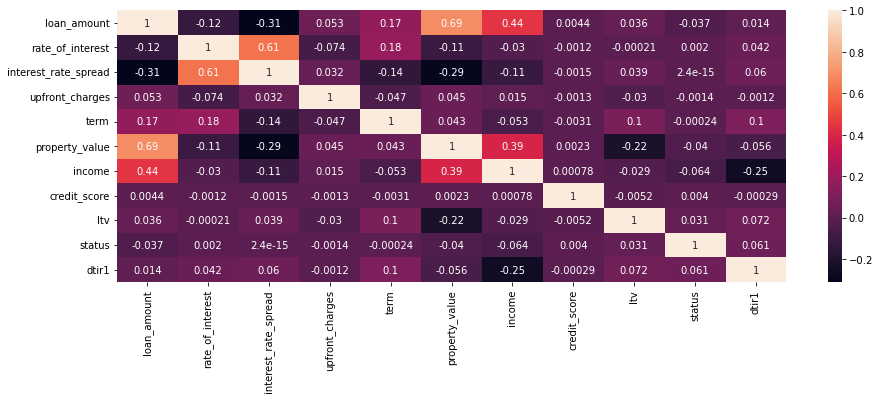

In [35]:
#check the correlation
fig_heat=plt.figure(figsize=(15,5))
sns.heatmap(numeric_df.corr(),annot=True)

array([[<AxesSubplot:title={'center':'dmy_ncf'}>,
        <AxesSubplot:title={'center':'dmy_pre'}>,
        <AxesSubplot:title={'center':'dmy_type2'}>,
        <AxesSubplot:title={'center':'dmy_type3'}>,
        <AxesSubplot:title={'center':'dmy_p2'}>,
        <AxesSubplot:title={'center':'dmy_p3'}>],
       [<AxesSubplot:title={'center':'dmy_p4'}>,
        <AxesSubplot:title={'center':'dmy_l2'}>,
        <AxesSubplot:title={'center':'dmy_opc'}>,
        <AxesSubplot:title={'center':'dmy_nob/c'}>,
        <AxesSubplot:title={'center':'dmy_not_neg'}>,
        <AxesSubplot:title={'center':'dmy_not_int'}>],
       [<AxesSubplot:title={'center':'dmy_not_lpsm'}>,
        <AxesSubplot:title={'center':'dmy_sb'}>,
        <AxesSubplot:title={'center':'dmy_pr'}>,
        <AxesSubplot:title={'center':'dmy_sr'}>,
        <AxesSubplot:title={'center':'dmy_land'}>,
        <AxesSubplot:title={'center':'dmy_2U'}>],
       [<AxesSubplot:title={'center':'dmy_3U'}>,
        <AxesSubplot:title={'center'

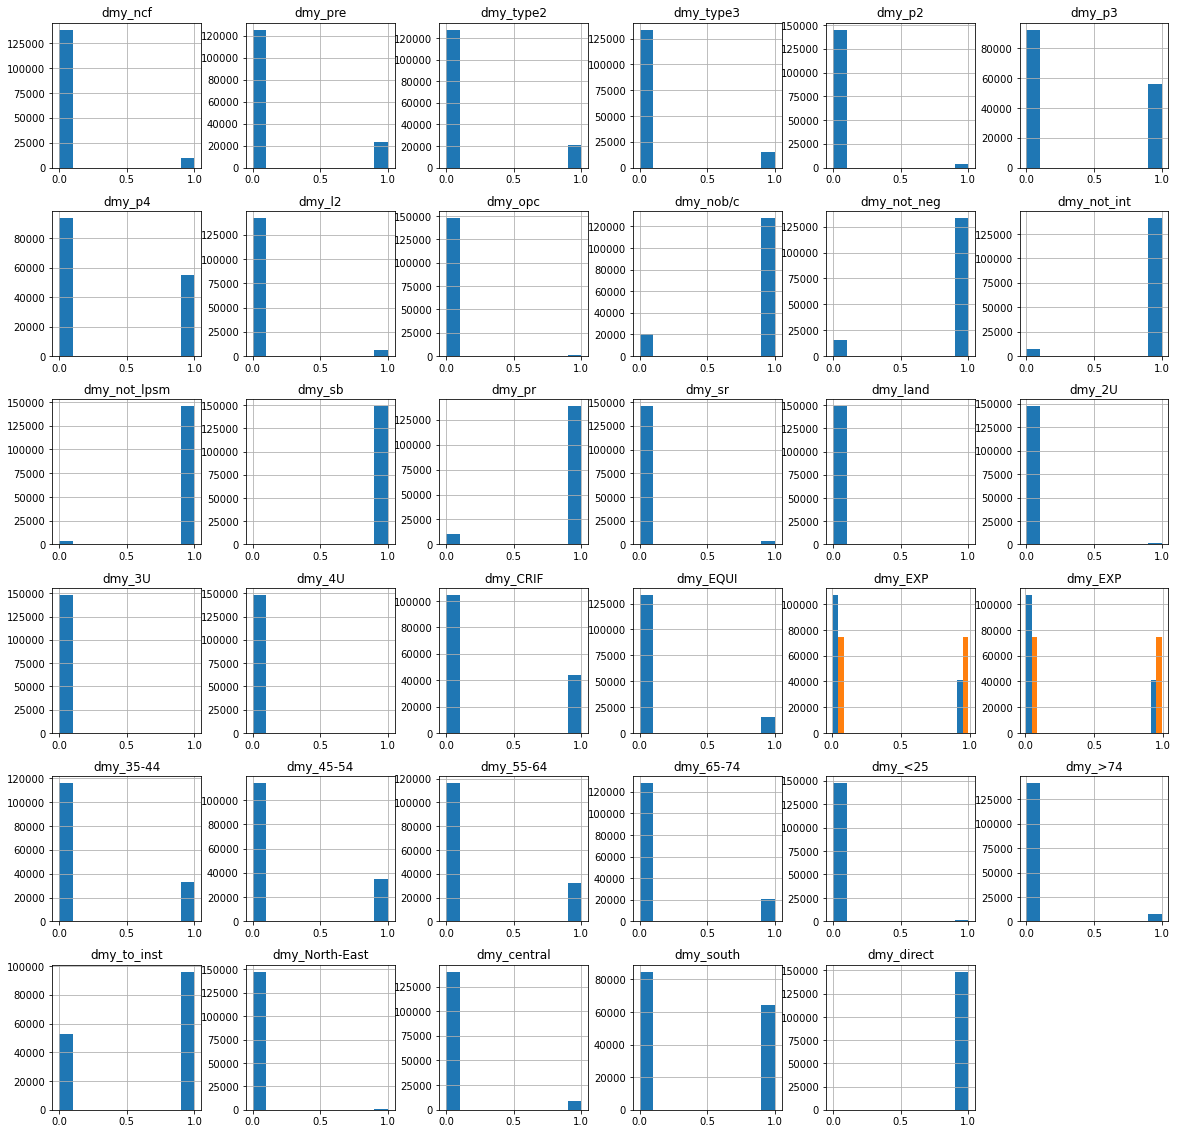

In [37]:
#Plot a histogram
cate_df.hist(figsize=(20,20))

In [114]:
# export the final DF as csv file
final_df.to_csv(r'C:\Users\Lenovo\Documents\GitHub\final_project_bankchurn\data\loan_cleaned.csv', index=False, header=True)